Today we want to use world happiness report to perform clsutering on different countries to see in which cluster they belong related to happiness

# Data Extraction and Preprocessing

First of all we need to import the libraries we need for computing and preprocessing as well as plotting the data and the results we get from the algorithm we use

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

we import our dataset using pandas as a DataFrame called df, this is the source of dataset in kaggle :https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

In [3]:
df = pd.read_csv('world-happiness-report-2021.csv', encoding='utf_8')

this part we start preprocessing by changing the names of the columns so we can do other stuff

In [4]:
df.rename(columns={'Regional indicator':'ind',
                   'Ladder score':'score',
                   'Standard error of ladder score':'stan',
                   'Logged GDP per capita':'gdpp',
                   'Social support':'soc',
                   'Healthy life expectancy':'heal',
                   'Freedom to make life choices':'free',
                   'Perceptions of corruption':'perc',
                   'Ladder score in Dystopia':'dyst',
                   'Explained by: Freedom to make life choices':'efree',
                   'Explained by: Log GDP per capita':'egdp',
                   'Explained by: Social support':'esoc',
                   'Explained by: Healthy life expectancy':'eheal',
                   'Explained by: Generosity':'egen',
                   'Explained by: Perceptions of corruption':'eperc',
                   'Dystopia + residual':'dr',
                   'Country name':'name'},inplace=True)

we change our indexes to be names of the countries

In [5]:
df.drop('ind', axis=1, inplace=True)
df

,name,score,stan,upperwhisker,lowerwhisker,gdpp,soc,heal,free,Generosity,perc,dyst,egdp,esoc,eheal,efree,egen,eperc,dr
0,Finland,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [6]:
df.rename(index=df.name, inplace=True)
df

,name,score,stan,upperwhisker,lowerwhisker,gdpp,soc,heal,free,Generosity,perc,dyst,egdp,esoc,eheal,efree,egen,eperc,dr
Finland,Finland,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Denmark,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Switzerland,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Iceland,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Netherlands,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,Lesotho,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,Botswana,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,Rwanda,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
Zimbabwe,Zimbabwe,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [7]:
df.drop('name',axis=1, inplace=True)
df

,score,stan,upperwhisker,lowerwhisker,gdpp,soc,heal,free,Generosity,perc,dyst,egdp,esoc,eheal,efree,egen,eperc,dr
Finland,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
Zimbabwe,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


we try to find out more about the dataset and see if we have any NaN data

In [8]:
df.describe()

,score,stan,upperwhisker,lowerwhisker,gdpp,soc,heal,free,Generosity,perc,dyst,egdp,esoc,eheal,efree,egen,eperc,dr
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [9]:
df.isna().sum()

score           0
stan            0
upperwhisker    0
lowerwhisker    0
gdpp            0
soc             0
heal            0
free            0
Generosity      0
perc            0
dyst            0
egdp            0
esoc            0
eheal           0
efree           0
egen            0
eperc           0
dr              0
dtype: int64

# Data Visuals:

we visualize the data to get a better feel of the data

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


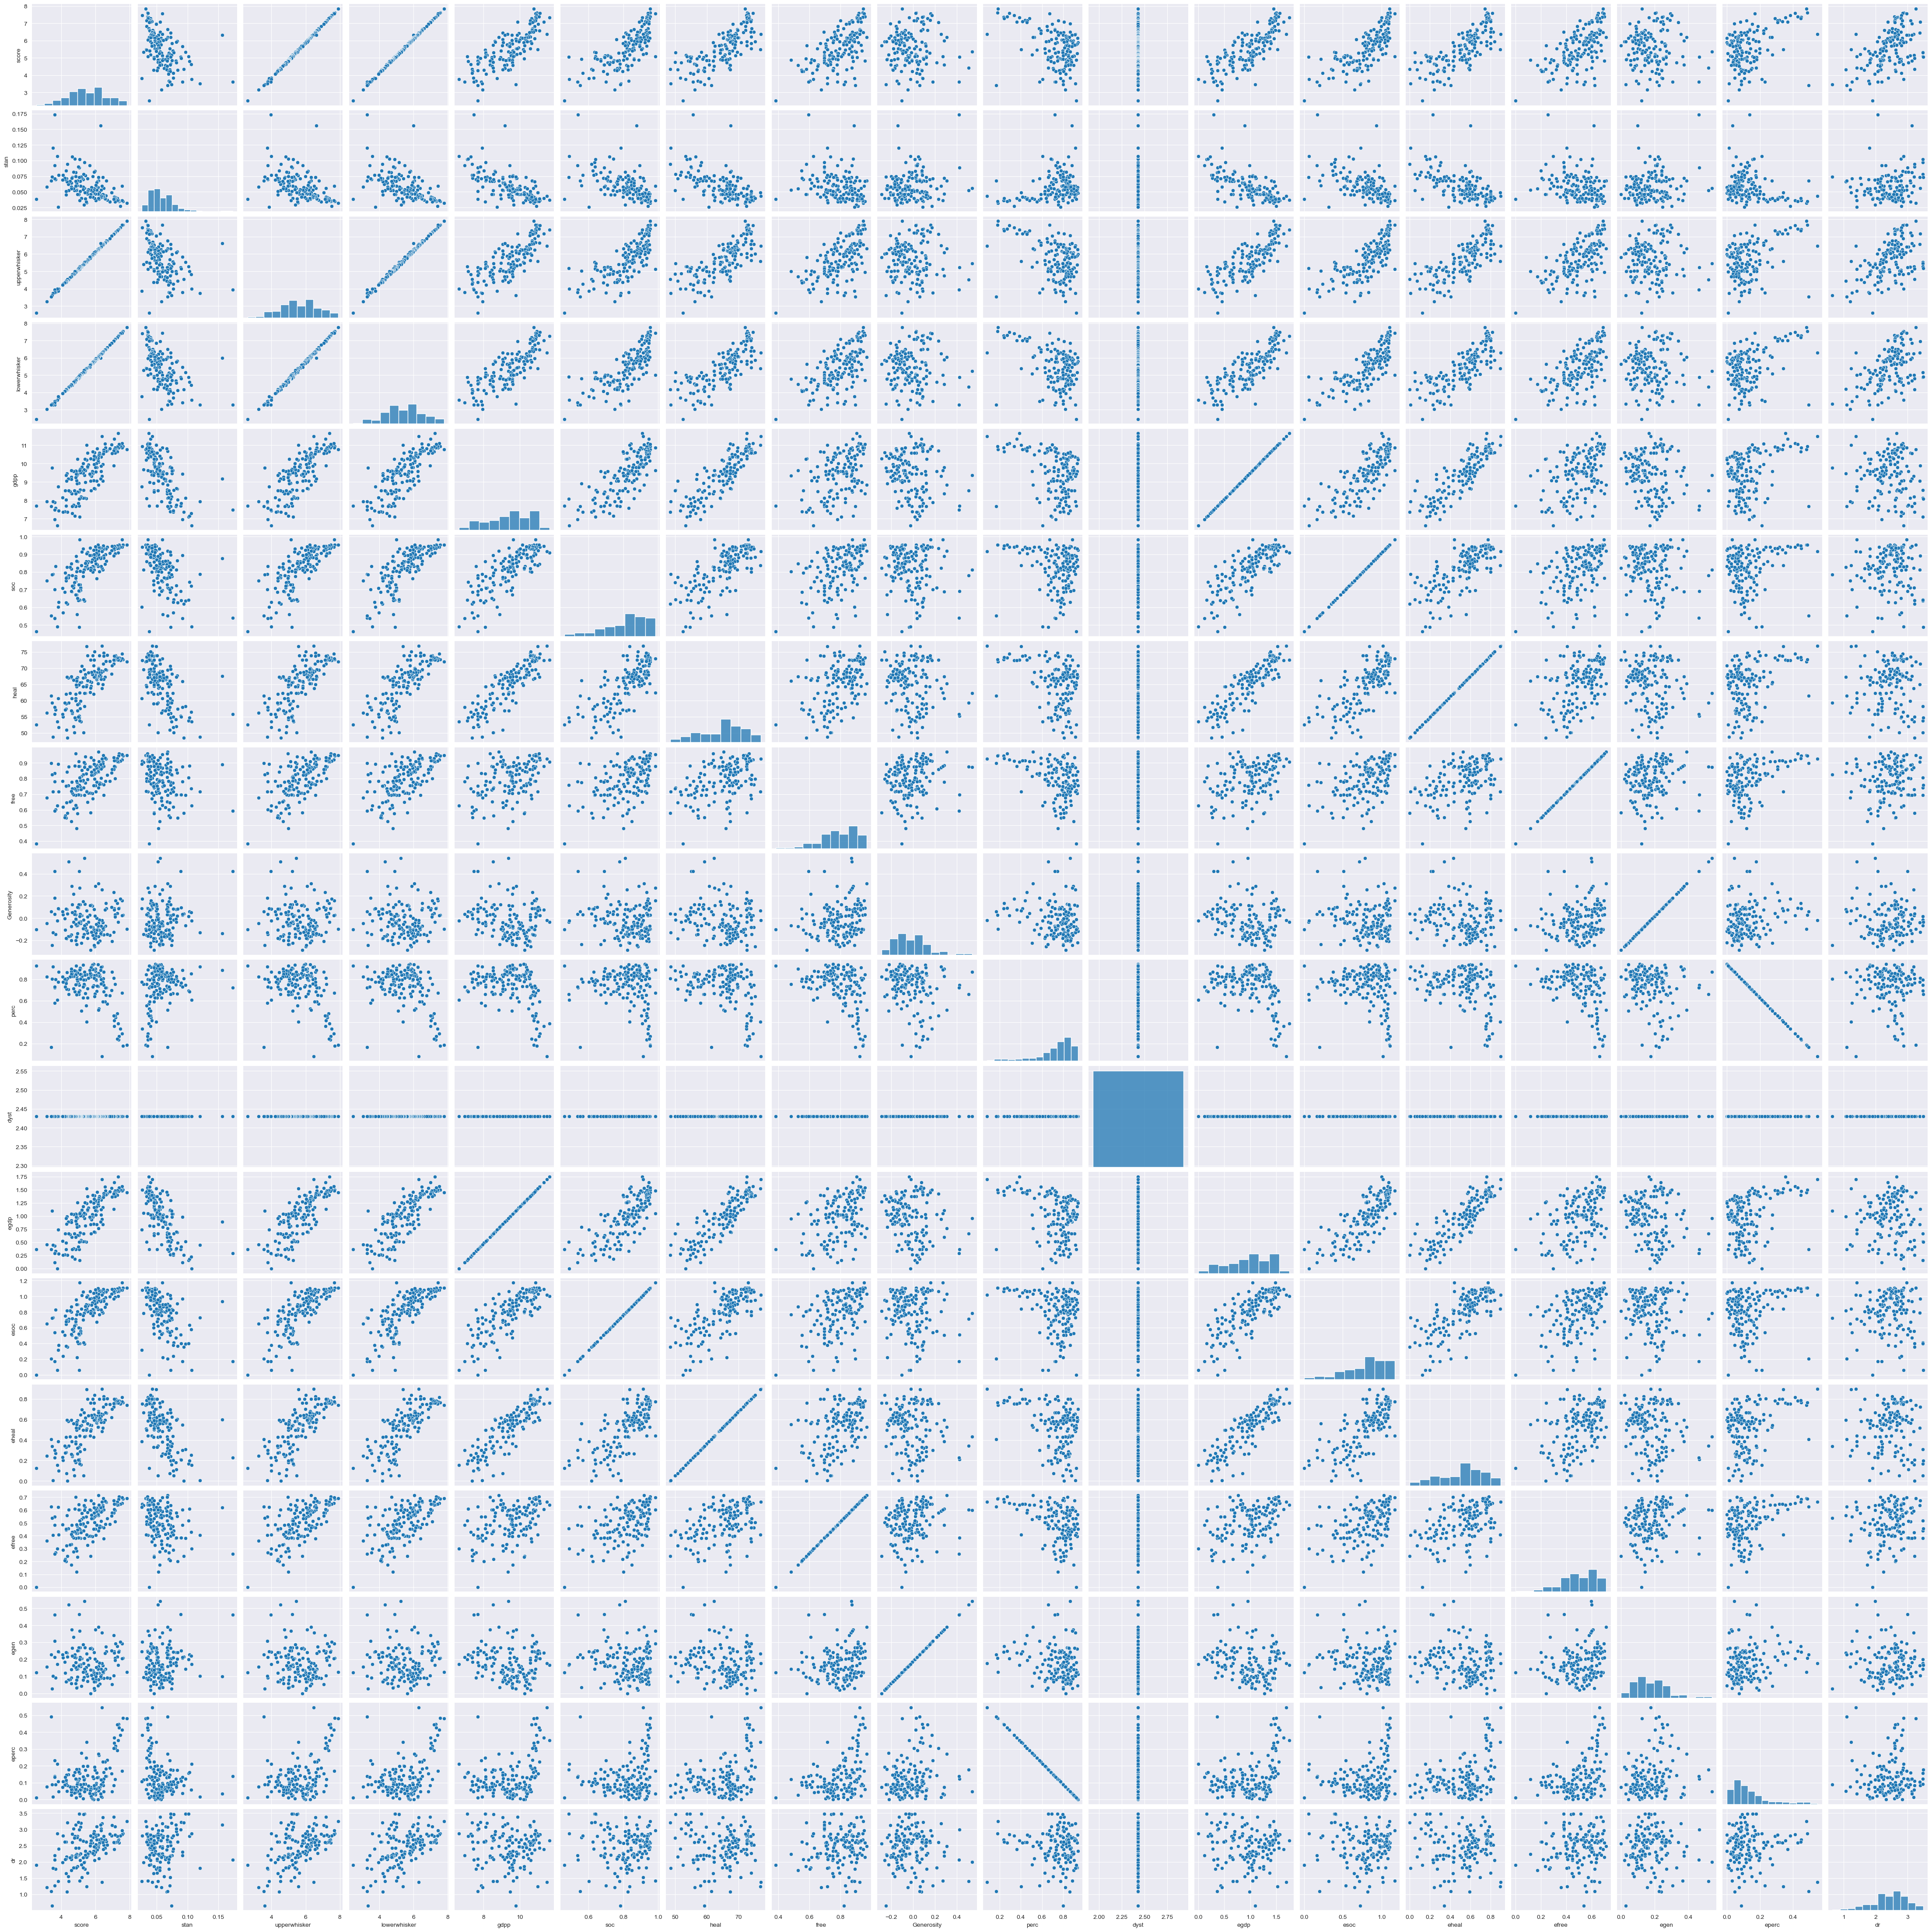

In [10]:
import seaborn as sns

sns.pairplot(df)

# MEANSHIFT:

Mean shift is a non-parametric feature-space mathematical analysis technique for locating the maxima of a density function, a so-called mode-seeking algorithm. Application domains include cluster analysis in computer vision and image processing.

now we use meanshift for clustering and we plot the data and the result

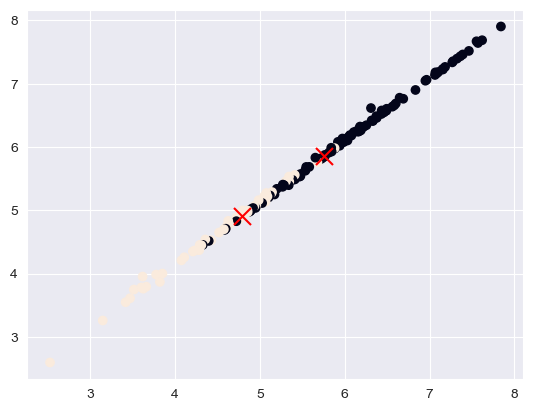

In [11]:
mean = MeanShift()
mean.fit(df)
labels = mean.labels_
center = mean.cluster_centers_
plt.scatter(df.iloc[:,0], df.iloc[:,2], marker="o", c=labels)
plt.scatter(center[:,0], center[:,2], marker="x", s=150, c="r")
plt.show()

we use this function to get the amount of inertia and we get the silhouette too

In [12]:
def compute_inertia(df, labels, centers):
    inertia = 0
    for i, label in enumerate(labels):
        center = centers[label]
        point = df.iloc[i, :]
        inertia += np.sum((point - center) ** 2)
    return inertia

inertia_MEANSHIFT = compute_inertia(df, labels, center)
print('Inertia for MEANSHIFT:', inertia_MEANSHIFT)

silhouette_avg_meanshift = silhouette_score(df, labels)
print('silhouette for meanshift',silhouette_avg_meanshift)


Inertia for MEANSHIFT: 3316.343163398745
silhouette for meanshift 0.601280216039802


now that we are done with meanshift we start doing other clustering methods to see which one performs the best

# K-MEANS

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

now we import KMeans from sklearn and do the same process on it to get the best number of clusters and its inertia

In [13]:
from sklearn.cluster import KMeans

we call the Kmeans class to perform it on our data

In [14]:
kmn = KMeans(n_clusters=3)
kmn.fit(df)
best_labels = kmn.predict(df)
center = kmn.cluster_centers_

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


we plot the data with labels we predicted

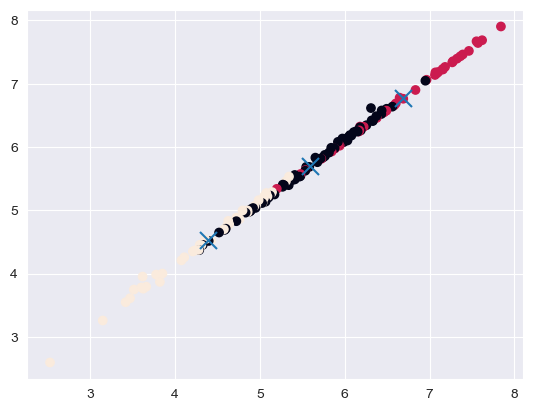

In [15]:
plt.scatter(df.iloc[:,0], df.iloc[:,2], c=best_labels)
plt.scatter(center[:,0], center[:,2], marker='x', s=150)
plt.show()

In [16]:
print('Kmeans inertia:',kmn.inertia_)
silhouette_avg_kmeans = silhouette_score(df, best_labels)
print('silhouette_avg_kmeans',silhouette_avg_kmeans)

Kmeans inertia: 1197.914301729937
silhouette_avg_kmeans 0.523385527977638


now we try diffeerent amounts for k to see which has the best results

In [17]:
y=[]
for k in np.arange(1, 11):
    kmn = KMeans(n_clusters=k)
    kmn.fit(df)
    y.append(kmn.inertia_)

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

we plot to see the differeent inertia for k to use the elbow method

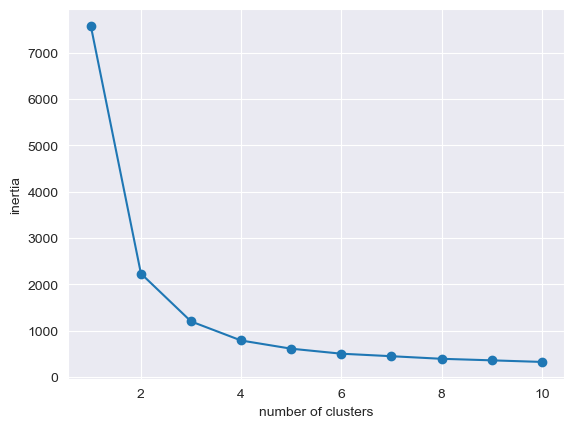

In [18]:
plt.plot(np.arange(1, 11), y, 'o-')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

by using the elbow method we see the best number of clusters are three and the inertia is about 3 times better using this clustering method

# DBSCAN

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is a popular clustering algorithm used in machine learning and data mining to group points in a dataset that are closely packed together, based on their distance to other points

now we import DBscan to see how it performs and do the exact same stuff , however this clustering method doesnt have inertia but we tested different amounts for esp and yet this clustering method performed the worst

In [19]:
from sklearn.cluster import DBSCAN

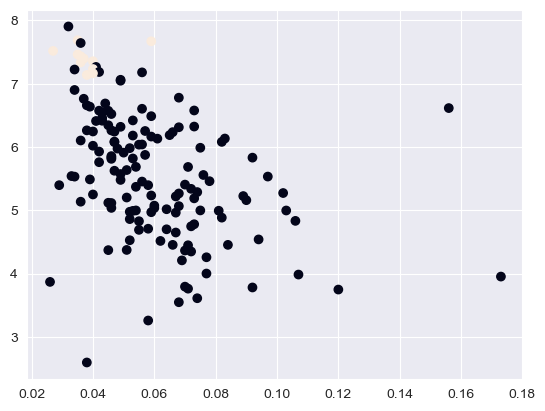

In [20]:
dbscan = DBSCAN(eps=0.9, min_samples=10)
dbscan.fit(df)
labels = dbscan.labels_
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=labels)
plt.show()

In [21]:
silhouette_avg_dbscan = silhouette_score(df, labels)
print('silhouette dbscan', silhouette_avg_dbscan)

silhouette dbscan 0.10972800668743418


we try different amounts for esp and min sample values so we get the best amount which is esp = 0.9 and min sample values = 10

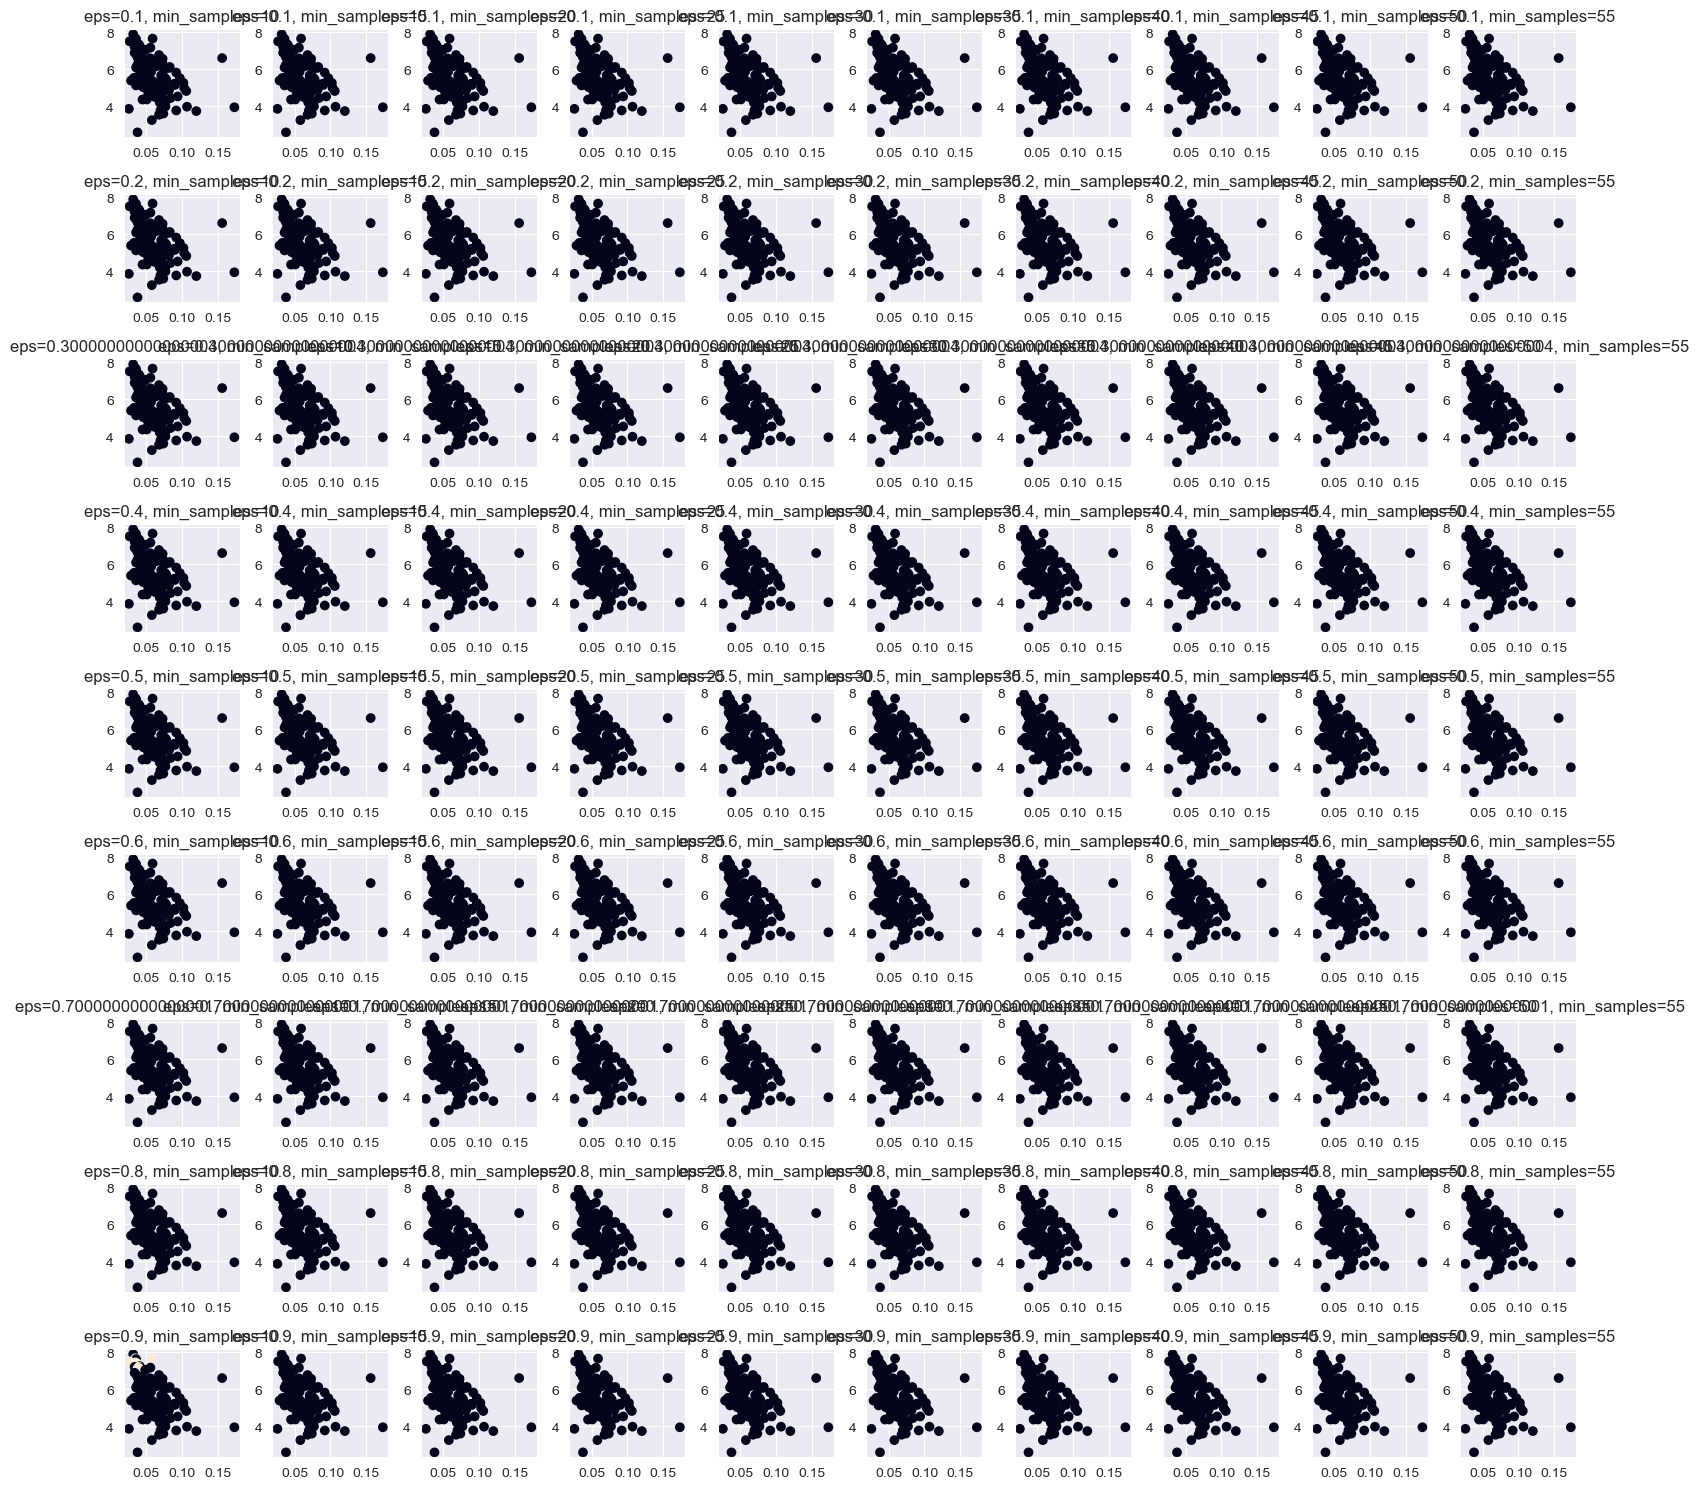

In [22]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(10, 60, 5)

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df)
        labels = dbscan.labels_

        axs[i, j].scatter(df.iloc[:,1], df.iloc[:,2], c=labels)
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}')

plt.tight_layout()
plt.show()

as we can see DBscan performs awfully on this dataset and we better not use this method for clustering

# KMEDOIDS

The k-medoids problem is a clustering problem similar to k-means. The name was coined by Leonard Kaufman and Peter J. Rousseeuw with their PAM (Partitioning Around Medoids) algorithm.Both the k-means and k-medoids algorithms are partitional (breaking the dataset up into groups) and attempt to minimize the distance between points labeled to be in a cluster and a point designated as the center of that cluster

now we start to use another K related method called KMEDOIDS

this method is in scikit extra, so we install it using pip

In [23]:
!pip install scikit-learn-extra

we import the library and object so we can use it on our data

In [24]:
from sklearn_extra.cluster import KMedoids

we start performing the clustering method on our data and plot it with the resulting clusters

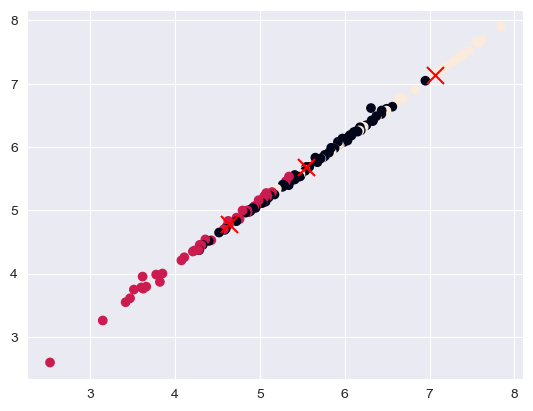

In [25]:
kmed = KMedoids(n_clusters=3, random_state=0)

kmed.fit(df)

labels = kmed.labels_
centers = kmed.cluster_centers_

plt.scatter(df.iloc[:,0], df.iloc[:,2], marker="o", c=labels)
plt.scatter(centers[:,0], centers[:,2], marker="x", s=150, c="r")
plt.show()

now we calculate the related metrics

In [26]:
inertia_kmedoid = compute_inertia(df, labels, centers)
print('inertia for kmedoid:', inertia_kmedoid)
silhouette_avg_kmediod = silhouette_score(df, labels)
print('silhouette for kmediod:', silhouette_avg_kmediod)

inertia for kmedoid: 1252.824198
silhouette for kmediod: 0.523385527977638


# HIERARCHY

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

now we want to do a different type of clustering called hierarchy
First we import the libaries and objects

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

first we do a test run of this me

In [28]:
Z = linkage(df, method='ward')

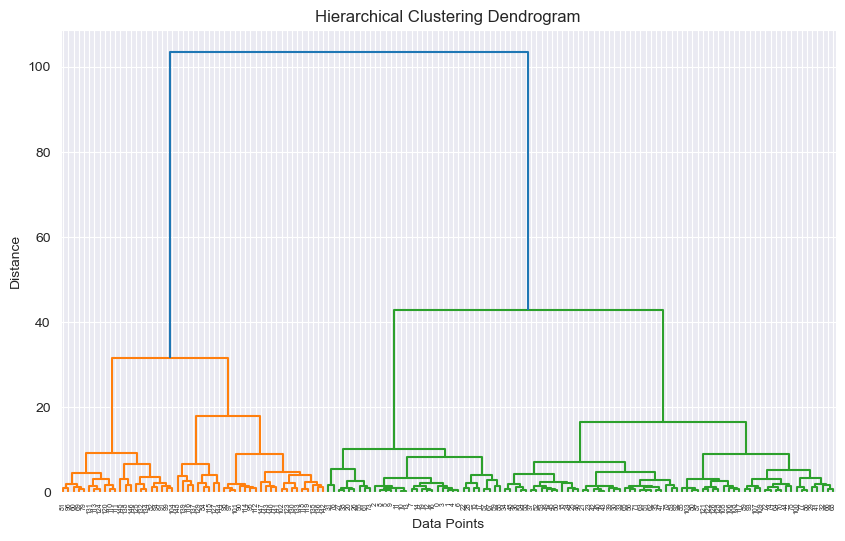

In [29]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

now we want to find the best parameters for this method

In [30]:
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {method: linkage(df, method=method) for method in methods}

we plot each result

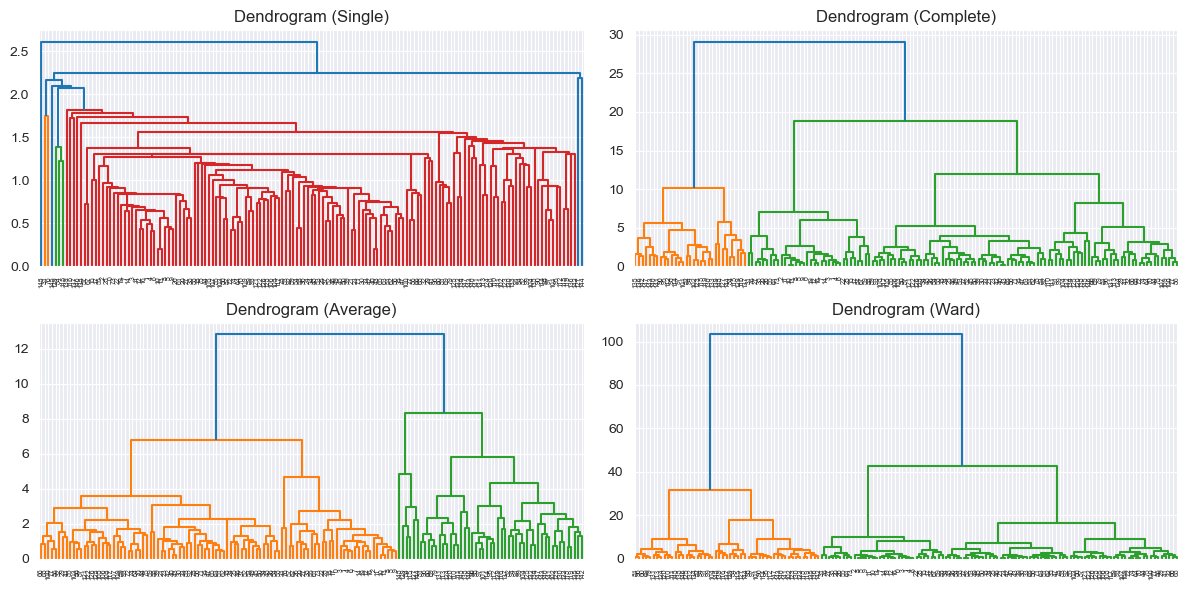

In [31]:
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    dendrogram(linkage_matrices[method])
    plt.title(f"Dendrogram ({method.capitalize()})")
plt.tight_layout()
plt.show()

we compute the silhouette to compare the results and see that ward performs the best

In [32]:
silhouette_scores = {}
for method in methods:
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = agg_clustering.fit_predict(df)
    silhouette_scores[method] = silhouette_score(df, labels)

print("Silhouette Scores for different linkage methods:")
for method, score in silhouette_scores.items():
    print(f"{method.capitalize()}: {score:}")


Silhouette Scores for different linkage methods:
Single: 0.3197039139131187
Complete: 0.4674400665890533
Average: 0.5171507415736911
Ward: 0.5255413620118781


now we perform it for one last time

In [33]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(df)

now we plot the data with predicted results

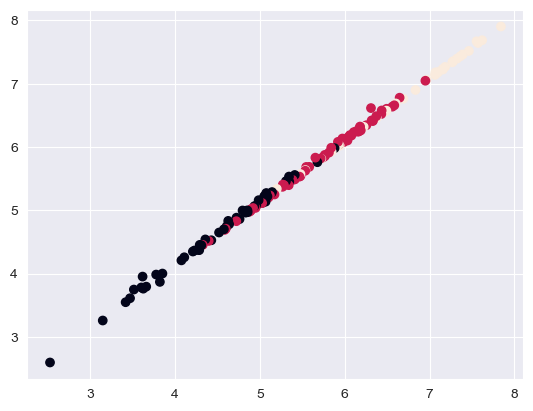

In [34]:
plt.scatter(df.iloc[:,0], df.iloc[:,2], marker="o", c=labels)
plt.show()

In [35]:
silhouette_avg_hierarchy = silhouette_score(df, labels)

print(f"Silhouette Score for hierarchy: {silhouette_avg_hierarchy:}")

Silhouette Score for hierarchy: 0.5255413620118781


# FUZZY C_MEANS

first we install Scikit-fuzzy, this method uses fuzzy rules

In [36]:
!pip install scikit-fuzzy

Fuzzy c-means clustering is an iterative process that starts from randomized initialization of membership degrees and updating centroids and membership degrees until minimization criteria for objective function are met.

we import the library

In [37]:
import skfuzzy as fuzz

now we perform the method on our data to get the results

In [38]:
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df.T, c=3, m=2, error=0.005, maxiter=1000)
cluster_assignments = np.argmax(u, axis=0)

In [39]:
fuzzy_centers = cntr.T

now we plot the result and get the metrics score

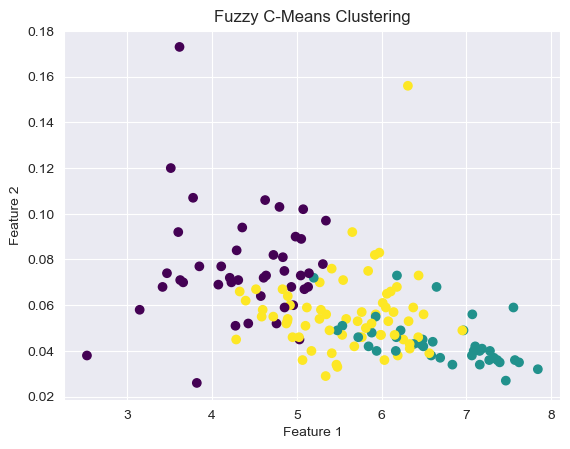

In [40]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_assignments, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Fuzzy C-Means Clustering')
plt.show()

In [41]:
silhouette_avg_fmeans = silhouette_score(df, cluster_assignments)
print('silhouette for fuzzy CMeans:', silhouette_avg_fmeans)

silhouette for fuzzy CMeans: 0.523385527977638


# RESULTS

I have put all the result in a excel file to be able to compare it easier
this is the results

as a result now we know KMeans with k=3 performs the best between them all and although we got less amount for inertia but it doesnt mean we did a better job, clustering has a lot more to it than only these